In [3]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

In [4]:
def ImageFormationModel(img, x0, y0, sigma):
    
    img_copy = img.copy()
    nr, nc = img_copy.shape[:2]
    illumination = np.zeros([nr, nc], dtype='float32')
    
    # 打光函數
    for x in range(nr): 
        for y in range(nc):
            illumination[x, y] = np.exp(-(((x-x0)**2+(y-y0)**2)/(2*sigma**2)))
            
    for c in range(img.shape[2]):
        for x in range(nr):
            for y in range(nc):
                val = illumination[x, y]*img[x,y,c]
                img_copy[x,y,c] = val
                
    return illumination, img_copy

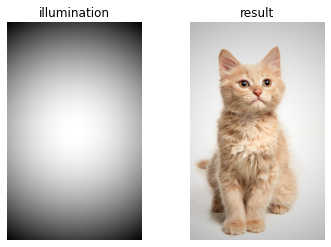

In [11]:
if __name__ == "__main__":
    img = cv2.imread('./cat.png')
    nr, nc = img.shape[:2]
    #print(nr, nc)
    x0 = nr//2
    y0 = nc//2
    # 打光範圍（半徑）
    sigma = 500 
    illumination, new_img = ImageFormationModel(img, x0, y0, sigma)
    
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title('illumination')
    plt.imshow(illumination, cmap='gray')
    
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title('result')
    plt.imshow(new_img[:,:,::-1])
    plt.show()